
Random Forest (Raw):
  MSE: 11951.60
  R²:  0.3925


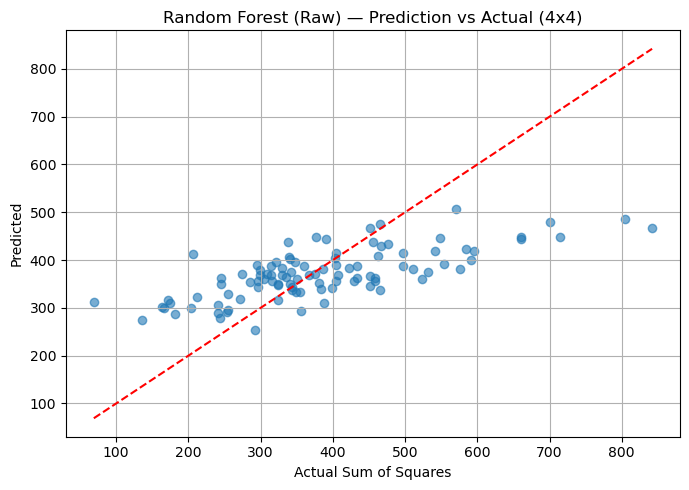

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

train_df = pd.read_csv('train_4x4_eigen_data.csv')
test_df = pd.read_csv('test_4x4_eigen_data.csv')

feature_cols = list("abcdefghijklmnop")
X_train = train_df[feature_cols]
y_train = train_df['sum_squared']
X_test = test_df[feature_cols]
y_true = test_df['sum_squared']

rf = RandomForestRegressor(n_estimators=200, max_depth=None, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
print(f"\nRandom Forest (Raw):")
print(f"  MSE: {mse:.2f}")
print(f"  R²:  {r2:.4f}")

test_df['predicted_sum_squared'] = y_pred
test_df.to_csv('test_4x4_eigen_data.csv', index=False)

plt.figure(figsize=(7, 5))
plt.scatter(y_true, y_pred, alpha=0.6)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')
plt.xlabel("Actual Sum of Squares")
plt.ylabel("Predicted")
plt.title("Random Forest (Raw) — Prediction vs Actual (4x4)")
plt.grid(True)
plt.tight_layout()
plt.show()


Random Forest (Enhanced):
  MSE: 6231.59
  R²:  0.6833


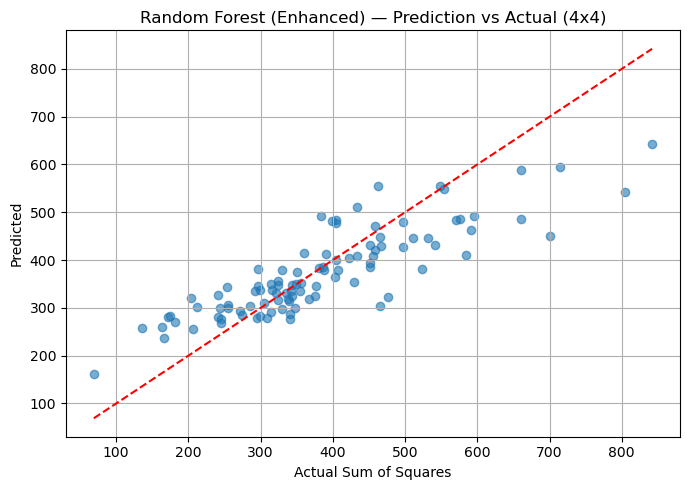

In [6]:
import numpy as np

def add_features(df):
    df['trace'] = df['a'] + df['f'] + df['k'] + df['p']
    
    def symmetry_score(row):
        mat = np.array([
            [row['a'], row['b'], row['c'], row['d']],
            [row['e'], row['f'], row['g'], row['h']],
            [row['i'], row['j'], row['k'], row['l']],
            [row['m'], row['n'], row['o'], row['p']],
        ])
        score = 0
        for i in range(4):
            for j in range(i + 1, 4):
                score += abs(mat[i][j] - mat[j][i])
        return score
    
    def det_4x4(row):
        mat = np.array([
            [row['a'], row['b'], row['c'], row['d']],
            [row['e'], row['f'], row['g'], row['h']],
            [row['i'], row['j'], row['k'], row['l']],
            [row['m'], row['n'], row['o'], row['p']]
        ])
        return np.linalg.det(mat)
    
    df['sym_score'] = df.apply(symmetry_score, axis=1)
    df['det'] = df.apply(det_4x4, axis=1)
    return df

train_df = add_features(pd.read_csv('train_4x4_eigen_data.csv'))
test_df = add_features(pd.read_csv('test_4x4_eigen_data.csv'))

feature_cols = list("abcdefghijklmnop") + ['trace', 'sym_score', 'det']
X_train = train_df[feature_cols]
y_train = train_df['sum_squared']
X_test = test_df[feature_cols]
y_true = test_df['sum_squared']

rf = RandomForestRegressor(n_estimators=200, max_depth=None, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
print(f"\nRandom Forest (Enhanced):")
print(f"  MSE: {mse:.2f}")
print(f"  R²:  {r2:.4f}")

test_df['predicted_sum_squared'] = y_pred
test_df.to_csv('test_4x4_eigen_data.csv', index=False)

plt.figure(figsize=(7, 5))
plt.scatter(y_true, y_pred, alpha=0.6)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')
plt.xlabel("Actual Sum of Squares")
plt.ylabel("Predicted")
plt.title("Random Forest (Enhanced) — Prediction vs Actual (4x4)")
plt.grid(True)
plt.tight_layout()
plt.show()